In [1]:
'''import csv
import os

# Path to the spectrums directory
spectrums_dir = 'spectrums'

# Read Cu_conc.txt
cu_data = []
with open('Cu_conc.txt', 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) >= 2:
            concentration = float(parts[0])
            filename = parts[1] + '.mca'  # Assuming filenames have .mca extension
            cu_data.append((concentration, filename))

# Read elements_windows.txt
elements = []
with open('elements_windows.txt', 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) >= 3:
            element = parts[0]
            t1 = int(parts[1])
            t2 = int(parts[2])
            elements.append({'element': element, 't1': t1, 't2': t2})

# Prepare to write output.csv
with open('data.csv', mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write header
    header = ['Concentration'] + [elem['element'] for elem in elements]
    writer.writerow(header)

    # Process each .mca file
    for concentration, filename in cu_data:
        file_path = os.path.join(spectrums_dir, filename)
        if not os.path.isfile(file_path):
            print(f"Warning: File {file_path} does not exist.")
            continue

        with open(file_path, 'r') as f:
            lines = f.readlines()

        # Extract REAL_TIME
        REAL_TIME = None
        for line in lines:
            if 'REAL_TIME' in line:
                REAL_TIME = float(line.strip().split('-')[1])
                break
        if REAL_TIME is None:
            print(f"Warning: REAL_TIME not found in {filename}.")
            continue

        # Find the index where data starts
        data_start_index = None
        for i, line in enumerate(lines):
            if '<<DATA>>' in line:
                data_start_index = i + 1
                break

        if data_start_index is None:
            print(f"Warning: <<DATA>> section not found in {filename}.")
            continue

        # Read data values
        data_values = []
        for line in lines[data_start_index:]:
            line = line.strip()
            if line == '':
                continue
            try:
                value = int(line)
                data_values.append(value)
            except ValueError:
                # Reached end of data section
                break

        # Ensure data_values has enough entries
        max_t2 = max(elem['t2'] for elem in elements)
        if len(data_values) <= max_t2:
            print(f"Warning: Not enough data in {filename}. Expected up to channel {max_t2}.")
            continue

        # Compute sums for each element
        element_sums = []
        for elem in elements:
            t1 = elem['t1']
            t2 = elem['t2']
            # Sum data_values from t1 to t2 inclusive
            s = sum(data_values[t1:t2 + 1])
            # Divide by REAL_TIME
            s_norm = s / REAL_TIME
            element_sums.append(s_norm)

        # Write the row to CSV
        row = [concentration] + element_sums
        writer.writerow(row) '''

'import csv\nimport os\n\n# Path to the spectrums directory\nspectrums_dir = \'spectrums\'\n\n# Read Cu_conc.txt\ncu_data = []\nwith open(\'Cu_conc.txt\', \'r\') as f:\n    for line in f:\n        parts = line.strip().split()\n        if len(parts) >= 2:\n            concentration = float(parts[0])\n            filename = parts[1] + \'.mca\'  # Assuming filenames have .mca extension\n            cu_data.append((concentration, filename))\n\n# Read elements_windows.txt\nelements = []\nwith open(\'elements_windows.txt\', \'r\') as f:\n    for line in f:\n        parts = line.strip().split()\n        if len(parts) >= 3:\n            element = parts[0]\n            t1 = int(parts[1])\n            t2 = int(parts[2])\n            elements.append({\'element\': element, \'t1\': t1, \'t2\': t2})\n\n# Prepare to write output.csv\nwith open(\'data.csv\', mode=\'w\', newline=\'\') as csvfile:\n    writer = csv.writer(csvfile)\n    # Write header\n    header = [\'Concentration\'] + [elem[\'element\'

In [2]:
import numpy as np
import pandas as pd

import random
from tqdm import tqdm
from itertools import product
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def set_seed(seed_value=0):
    random.seed(seed_value)
    np.random.seed(seed_value)
SEED = 1511
set_seed(SEED)
plt.style.use('ggplot')
df = pd.read_csv('data.csv')
df.head(3)

,Concentration,S,Ag,Cr,Fe_Ka,Fe_Kb,Ar_Kb,Ca_Ka,Ni_Ka,Ni_kb,Cu_Ka,Cu_Kb,Zn_Ka,Zn_Kb,Pb_La,Pb_Lb,Ti,Nkr,Kr
0,13.85,12.672850,11.919510,5.943014,1313.858104,263.032779,5.892791,7.667325,19.921653,20.072321,1407.657281,210.550105,823.718485,146.348813,88.843875,115.997589,7.951920,1516.925034,315.230857
1,19.23,11.232387,11.165527,6.134354,1163.220619,241.212162,5.415615,8.190282,21.996757,23.016364,1813.612583,268.323667,913.183011,152.088522,86.282113,121.216173,7.555117,1467.731960,305.213365
2,18.54,12.776191,13.143611,5.377691,1006.864071,203.199893,6.496651,7.882826,23.397966,20.892830,1524.358268,226.414149,715.015782,125.757803,79.162283,115.403243,6.329642,1729.328457,351.771131


In [3]:
target_max = max(df['Concentration'])
target_min = min(df['Concentration'])

In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Concentration,S,Ag,Cr,Fe_Ka,Fe_Kb,Ar_Kb,Ca_Ka,Ni_Ka,Ni_kb,Cu_Ka,Cu_Kb,Zn_Ka,Zn_Kb,Pb_La,Pb_Lb,Ti,Nkr,Kr
0,0.148786,0.613372,0.579734,0.182163,0.284126,0.284359,0.632046,0.319164,0.508215,0.304699,0.567592,0.574302,0.129351,0.136746,0.471157,0.440472,0.284462,0.540220,0.537240
1,0.570086,0.466580,0.481058,0.223668,0.230845,0.243638,0.505429,0.518605,0.654706,0.460395,0.753695,0.757860,0.186098,0.159630,0.426885,0.520625,0.241177,0.505836,0.494606
2,0.516053,0.623903,0.739935,0.059534,0.175541,0.172700,0.792279,0.401350,0.753623,0.348092,0.621092,0.624705,0.060402,0.054652,0.303842,0.431344,0.107496,0.688684,0.692756
3,0.599060,0.631239,0.729734,0.170392,0.179699,0.178342,0.768586,0.291638,0.631255,0.408370,0.647547,0.643473,0.156179,0.152020,0.584592,0.748102,0.146998,0.652310,0.646111
4,0.354738,0.614966,0.623488,0.220242,0.230564,0.236530,0.510082,0.703966,0.630156,0.366864,0.587716,0.595087,0.187458,0.189514,0.646677,0.708342,0.252242,0.582900,0.583951


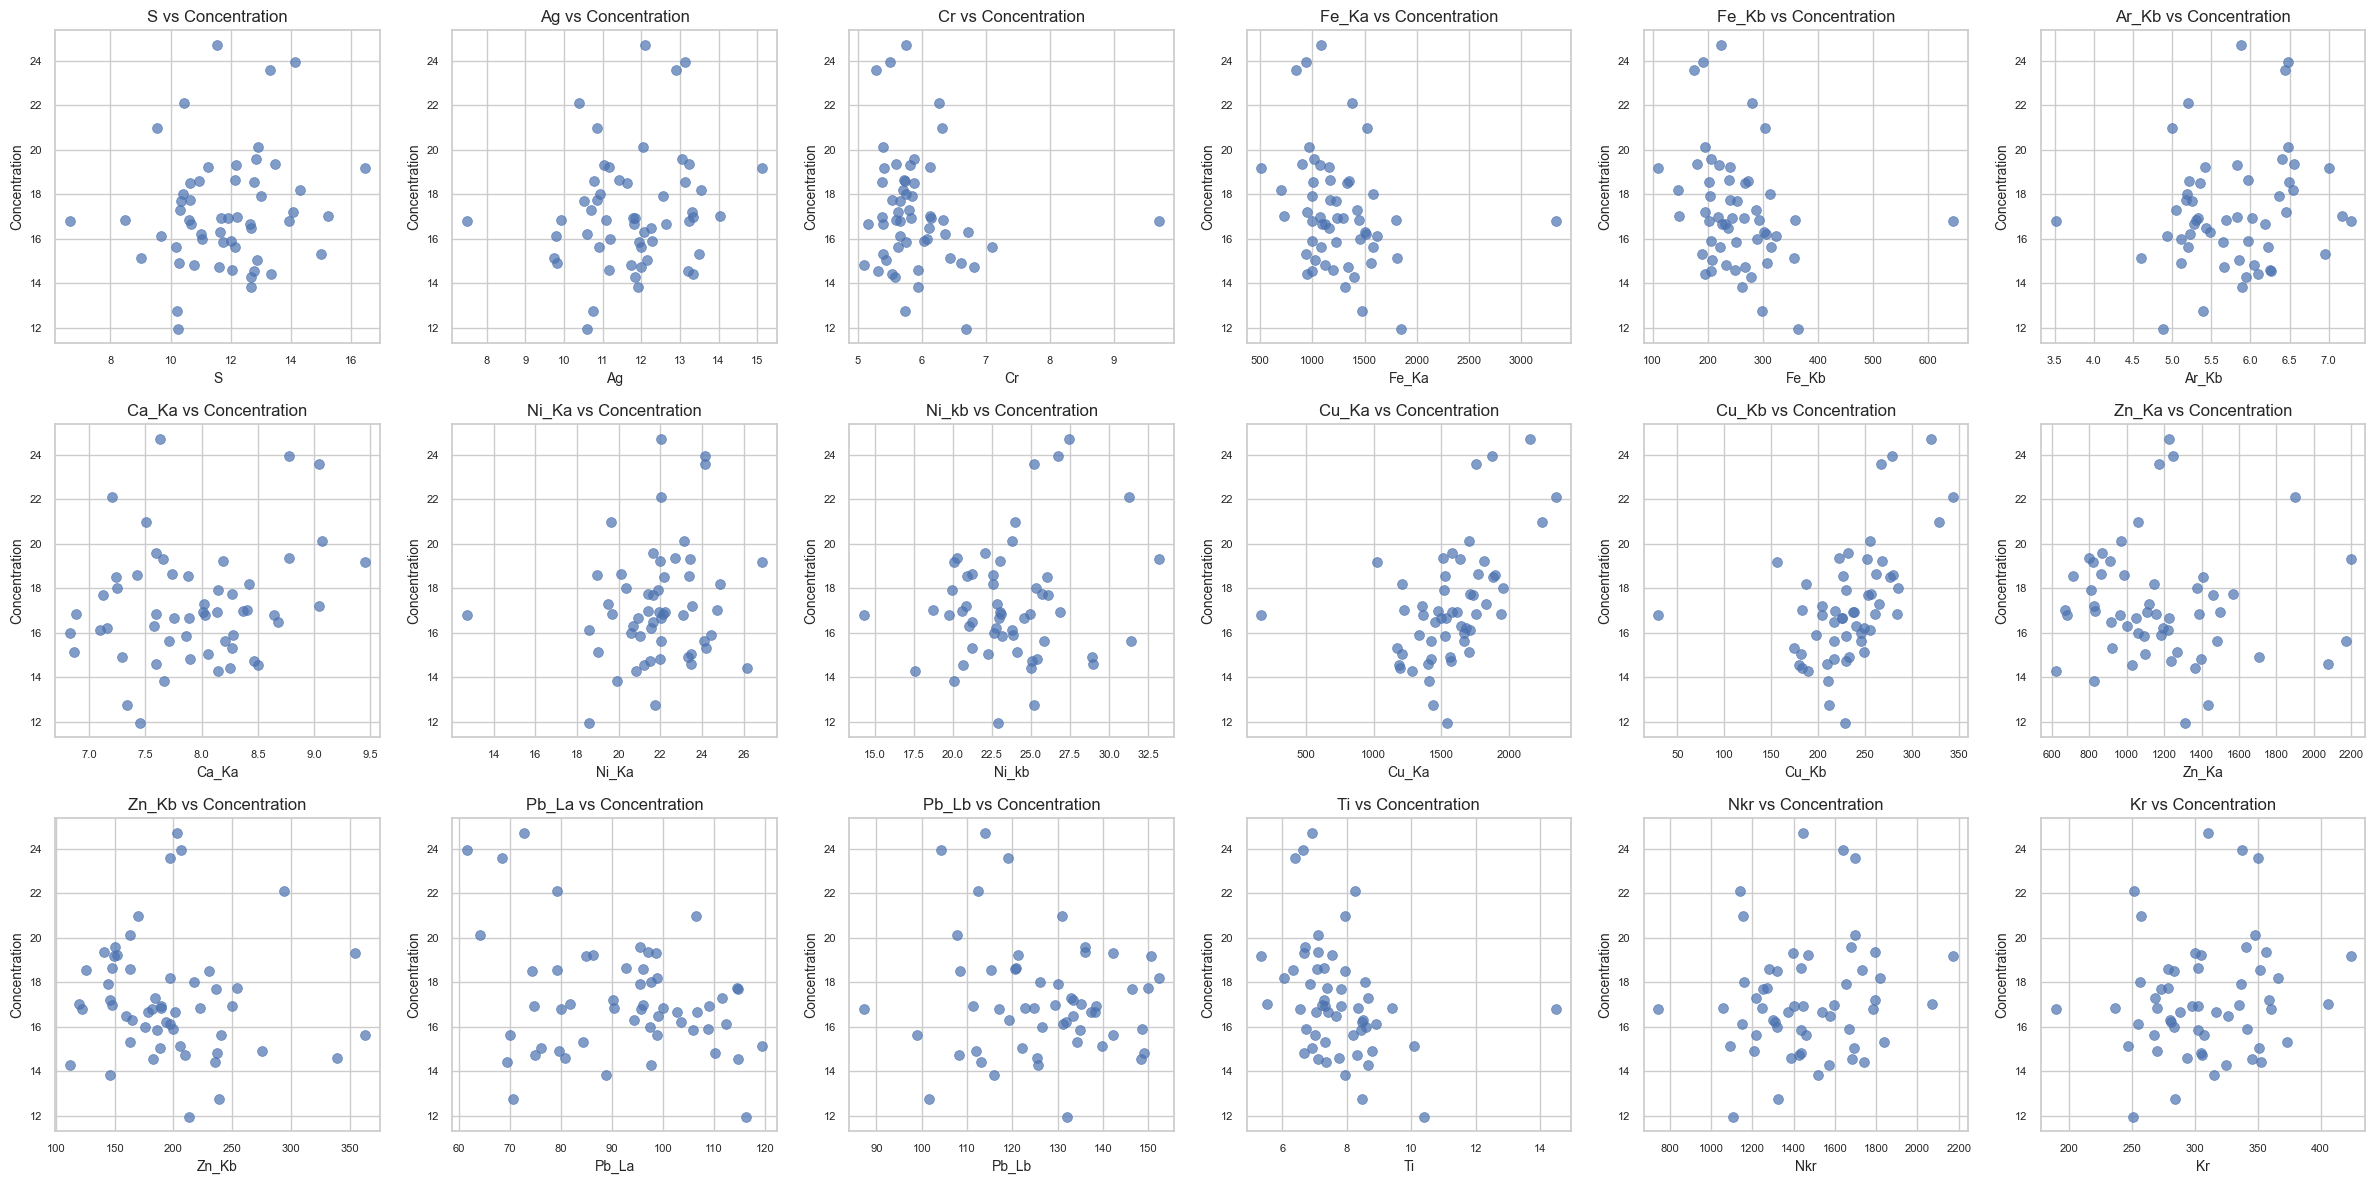

In [5]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude 'Concentration' from the features list
features = ['S', 'Ag', 'Cr', 'Fe_Ka', 'Fe_Kb', 'Ar_Kb', 'Ca_Ka', 'Ni_Ka',
            'Ni_kb', 'Cu_Ka', 'Cu_Kb', 'Zn_Ka', 'Zn_Kb', 'Pb_La', 'Pb_Lb', 'Ti',
            'Nkr', 'Kr']
n_cols = 6
n_features = len(features)
n_rows = math.ceil(n_features / n_cols)

sns.set(style="whitegrid")

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='Concentration', ax=axes[i], s=50, alpha=0.7, edgecolor=None)
    axes[i].set_title(f'{feature} vs Concentration', fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Concentration', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Hide any unused subplots
for ax in axes[n_features:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

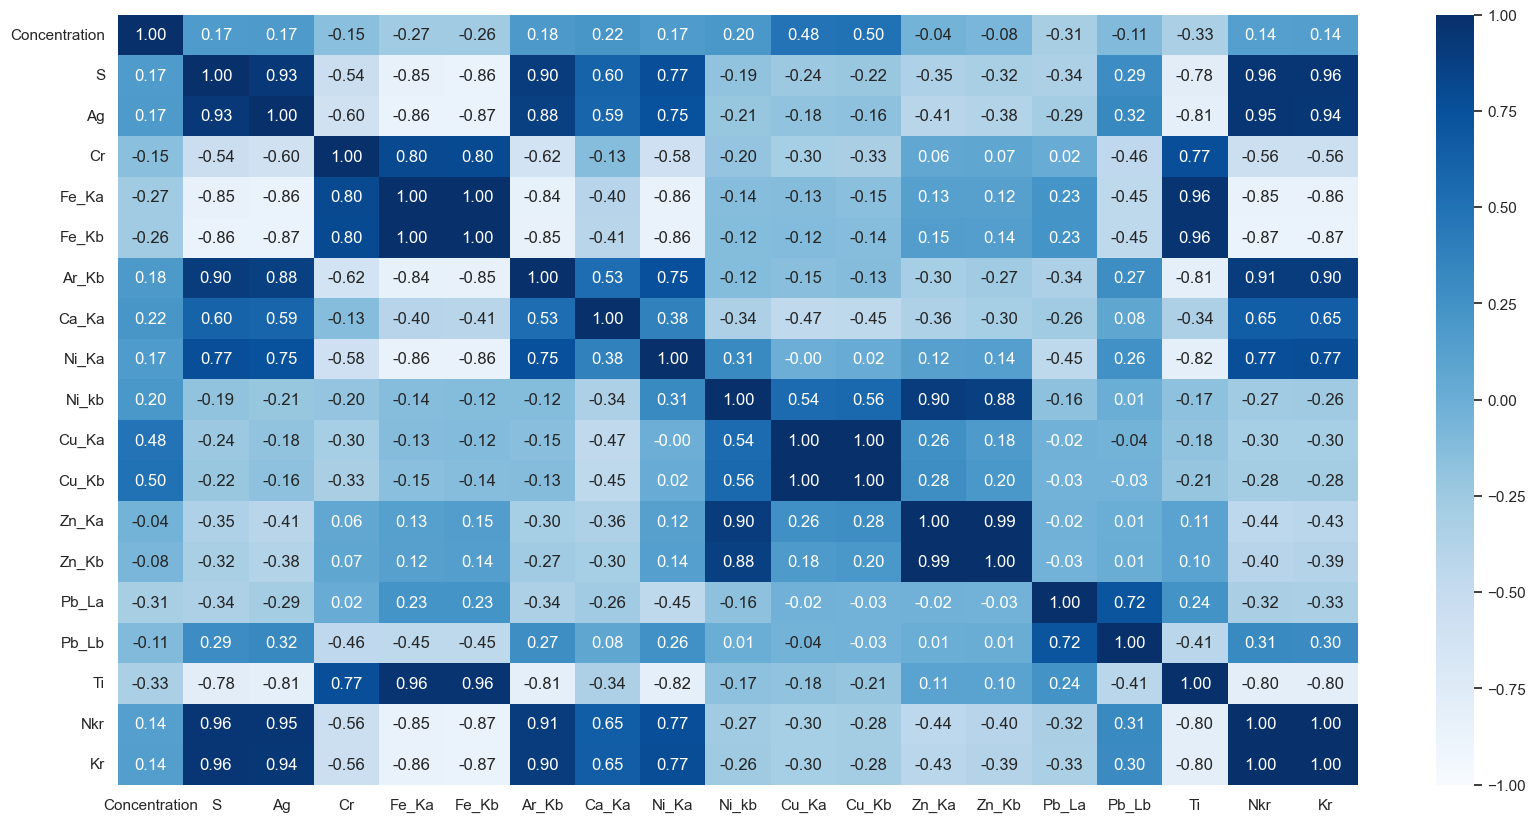

In [6]:
correlation_matrix = scaled_df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True,
            cmap='Blues', fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = scaled_df[features]
y = scaled_df['Concentration']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [8]:
train_data = [(np.array(x).reshape(-1, 1), y)
                 for x, y in zip(X_train.values.tolist(), y_train.values.tolist())]
test_data = [(np.array(x).reshape(-1, 1), y)
             for x, y in zip(X_test.values.tolist(), y_test.values.tolist())]

In [9]:
class Network(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = self.sigmoid(np.dot(w, a) + b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        set_seed(42)
        n = len(training_data)
        epoch_losses_train = []
        epoch_losses_test = []
        epoch_r2s_train = []
        epoch_r2s_test = []

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k + mini_batch_size]
                            for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)

            epoch_loss_train = self.calculate_loss(training_data)
            epoch_losses_train.append(epoch_loss_train)

            epoch_loss_test = self.calculate_loss(test_data)
            epoch_losses_test.append(epoch_loss_train)
            
            epoch_r2_train = self.calculate_r2(training_data)
            epoch_r2s_train.append(epoch_r2_train)

            epoch_r2_test = self.calculate_r2(test_data)
            epoch_r2s_test.append(epoch_r2_test)

        return {'losses_train': epoch_losses_train, 'losses_test': epoch_losses_test, 'r2s_train': epoch_r2s_train, 'r2s_test': epoch_r2s_test}

    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros_like(b) for b in self.biases]
        nabla_w = [np.zeros_like(w) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb + dnb for nb, dnb in zip(
                nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(
                nabla_w, delta_nabla_w)]
        self.weights = [w - (eta / len(mini_batch)) * nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (eta / len(mini_batch)) * nb for b,
                       nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        nabla_b = [np.zeros_like(b) for b in self.biases]
        nabla_w = [np.zeros_like(w) for w in self.weights]

        activation = x
        activations = [x]
        zs = [] 
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = self.sigmoid(z)
            activations.append(activation)

        delta = self.cost_derivative(
            activations[-1], y) * self.sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].T)

        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.sigmoid_prime(z)
            delta = np.dot(
                self.weights[-l + 1].T, delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l - 1].T)
        return (nabla_b, nabla_w)

    def cost_derivative(self, output_activations, y):
        return (output_activations - y)

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoid_prime(self, z):
        sz = self.sigmoid(z)
        return sz * (1 - sz)

    def calculate_loss(self, data):
        loss = 0
        for x, y in data:
            output = self.feedforward(x)
            loss += np.sum((output - y) ** 2)
        return loss / len(data)
    
    def calculate_r2(self, data):
        y_true = np.hstack([y for x, y in data])
        y_pred = np.hstack([self.feedforward(x) for x, y in data])

        y_mean = np.mean(y_true)

        ss_tot = np.sum((y_true - y_mean) ** 2)
        ss_res = np.sum((y_true - y_pred) ** 2)

        epsilon = 1e-10
        r2 = 1 - (ss_res / (ss_tot + epsilon))
        return r2

In [10]:
FIRST_HIDDEN = 18
SECOND_HIDDEN = 9
EPOCHS = 2500
LEARNING_RATE = 0.75
BATCH_SIZE = 8

In [11]:
net = Network([len(features), FIRST_HIDDEN, SECOND_HIDDEN, 1])
results = net.SGD(train_data, epochs=EPOCHS,
                       mini_batch_size=BATCH_SIZE, eta=LEARNING_RATE, test_data=test_data)

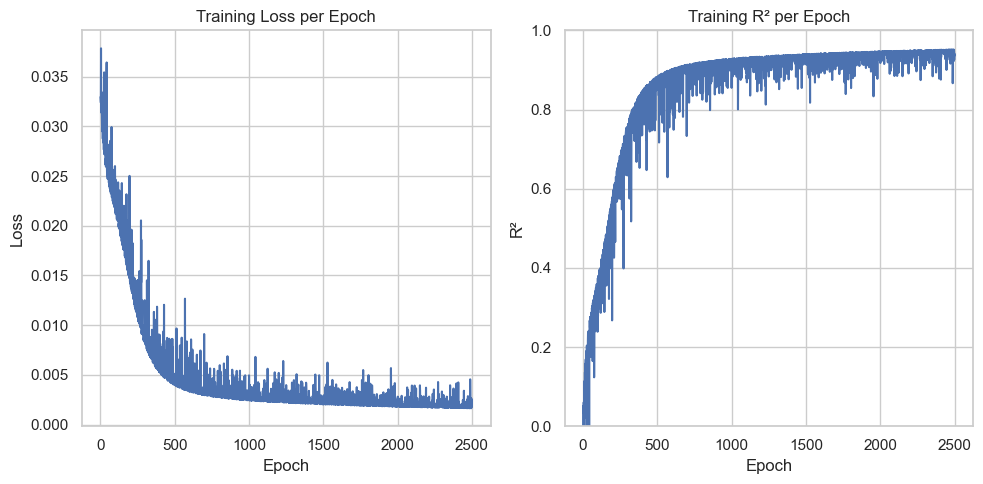

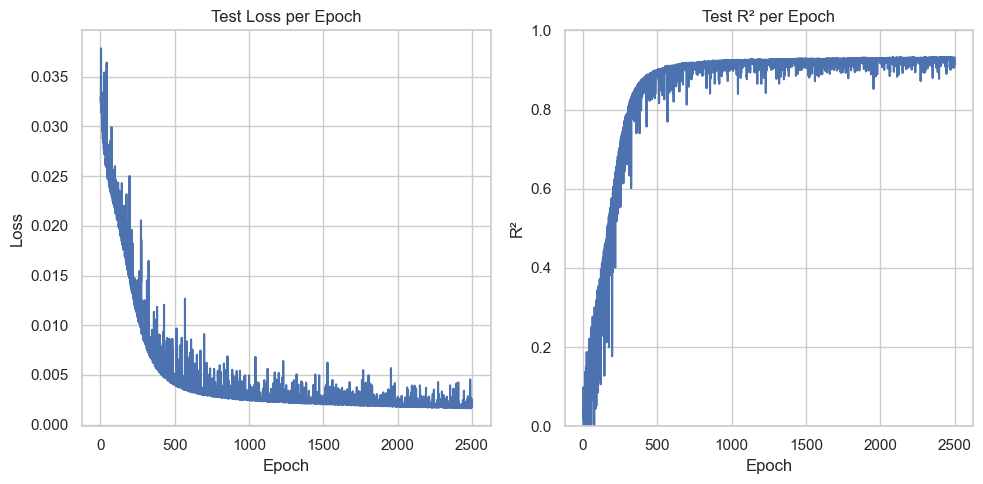

In [12]:
import matplotlib.pyplot as plt

# First figure for training data
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(range(1, len(results['losses_train']) + 1), results['losses_train'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss per Epoch')
ax1.grid(True)

ax2.plot(range(1, len(results['r2s_train']) + 1), results['r2s_train'])
ax2.set_xlabel('Epoch')
ax2.set_ylim(0, 1)
ax2.set_ylabel('R²')
ax2.set_title('Training R² per Epoch')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Second figure for test data
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(10, 5))

ax3.plot(range(1, len(results['losses_test']) + 1), results['losses_test'])
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.set_title('Test Loss per Epoch')
ax3.grid(True)

ax4.plot(range(1, len(results['r2s_test']) + 1), results['r2s_test'])
ax4.set_xlabel('Epoch')
ax4.set_ylabel('R²')
ax4.set_ylim(0, 1)
ax4.set_title('Test R² per Epoch')
ax4.grid(True)

plt.tight_layout()
plt.show()

In [13]:
def get_predictions(model, test_data):
    predictions = []
    for x, _ in test_data:
        predictions.append(model.feedforward(x) * (target_max - target_min) + target_min)
    return predictions


def plot_predictions(test_data, predictions):
    # Истинные значения
    true_values = [y * (target_max - target_min) + target_min for _, y in test_data]

    # Список предсказанных значений
    predicted_values = [pred[0] for pred in predictions]

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(test_data)), true_values,
             label='ground truth', color='green', linestyle ='-', marker = 'o')
    plt.plot(range(len(test_data)), predicted_values,
             label='prediction', color = 'red', linestyle = '--', marker = 'x')
    plt.xlabel('Sample')
    plt.ylabel('Concentration')
    plt.legend()
    plt.grid(True)
    plt.show()

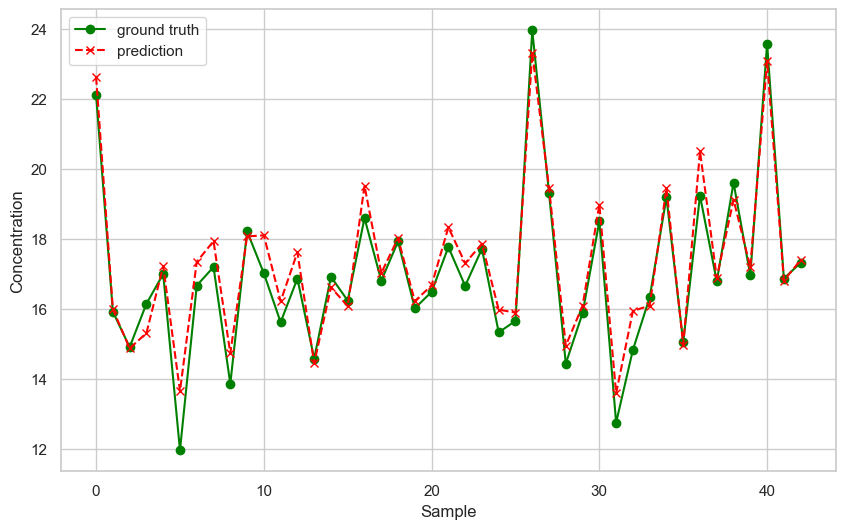

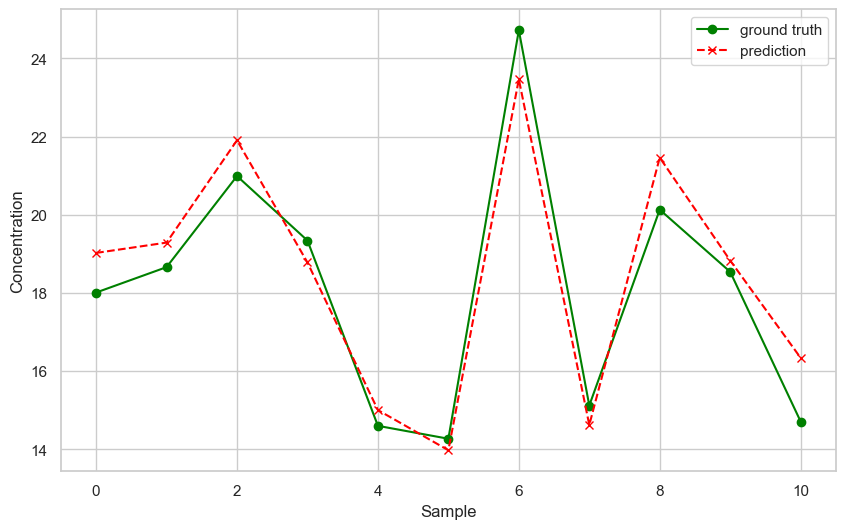

In [14]:
train_predictions = get_predictions(net, train_data)
test_predictions = get_predictions(net, test_data)
plot_predictions(train_data, train_predictions)
plot_predictions(test_data, test_predictions)

In [15]:
correlation_matrix = scaled_df.drop(columns=['Concentration']).corr()
label_correlation = scaled_df.corr()['Concentration']
columns_to_drop = set()
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and (correlation_matrix.loc[col1, col2] > 0.8):
            if label_correlation[col1] >= label_correlation[col2]:
                columns_to_drop.add(col2)
            else:
                columns_to_drop.add(col1)

filtered_df = scaled_df.drop(columns=columns_to_drop)

filtered_df.head()

,Concentration,Cr,Fe_Kb,Ar_Kb,Ca_Ka,Ni_Ka,Ni_kb,Cu_Kb,Pb_La,Pb_Lb
0,0.148786,0.182163,0.284359,0.632046,0.319164,0.508215,0.304699,0.574302,0.471157,0.440472
1,0.570086,0.223668,0.243638,0.505429,0.518605,0.654706,0.460395,0.757860,0.426885,0.520625
2,0.516053,0.059534,0.172700,0.792279,0.401350,0.753623,0.348092,0.624705,0.303842,0.431344
3,0.599060,0.170392,0.178342,0.768586,0.291638,0.631255,0.408370,0.643473,0.584592,0.748102
4,0.354738,0.220242,0.236530,0.510082,0.703966,0.630156,0.366864,0.595087,0.646677,0.708342


In [16]:
filtered_df.columns

Index(['Concentration', 'Cr', 'Fe_Kb', 'Ar_Kb', 'Ca_Ka', 'Ni_Ka', 'Ni_kb',
       'Cu_Kb', 'Pb_La', 'Pb_Lb'],
      dtype='object')

In [17]:
features = ['Cr', 'Fe_Kb', 'Ar_Kb', 'Ca_Ka', 'Ni_Ka', 'Ni_kb',
       'Cu_Kb', 'Pb_La', 'Pb_Lb']
X = filtered_df[features]
y = filtered_df['Concentration']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = SEED)

In [18]:
train_data = [(np.array(x).reshape(-1, 1), y)
                 for x, y in zip(X_train.values.tolist(), y_train.values.tolist())]
test_data = [(np.array(x).reshape(-1, 1), y)
             for x, y in zip(X_test.values.tolist(), y_test.values.tolist())]

In [19]:
net = Network([len(features), FIRST_HIDDEN , SECOND_HIDDEN , 1])
results = net.SGD(train_data, epochs=EPOCHS,
                       mini_batch_size=BATCH_SIZE, eta=LEARNING_RATE, test_data=test_data)

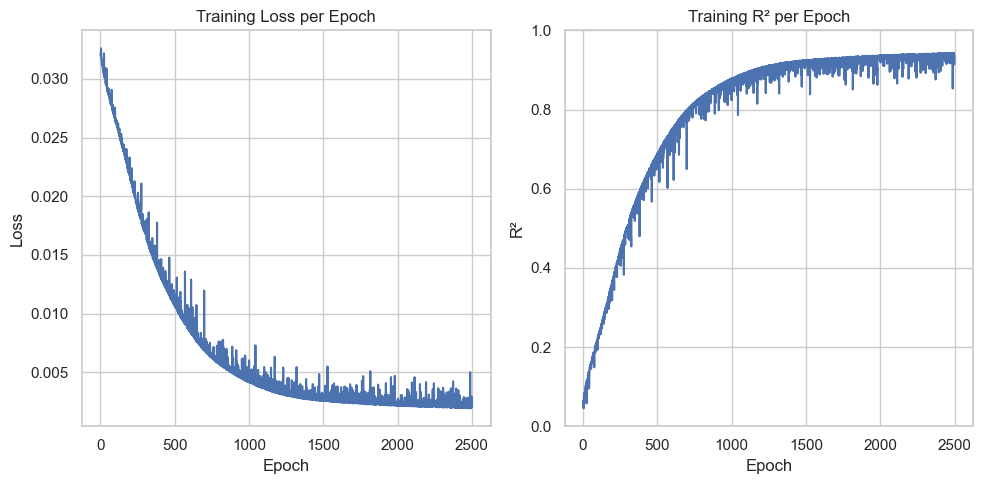

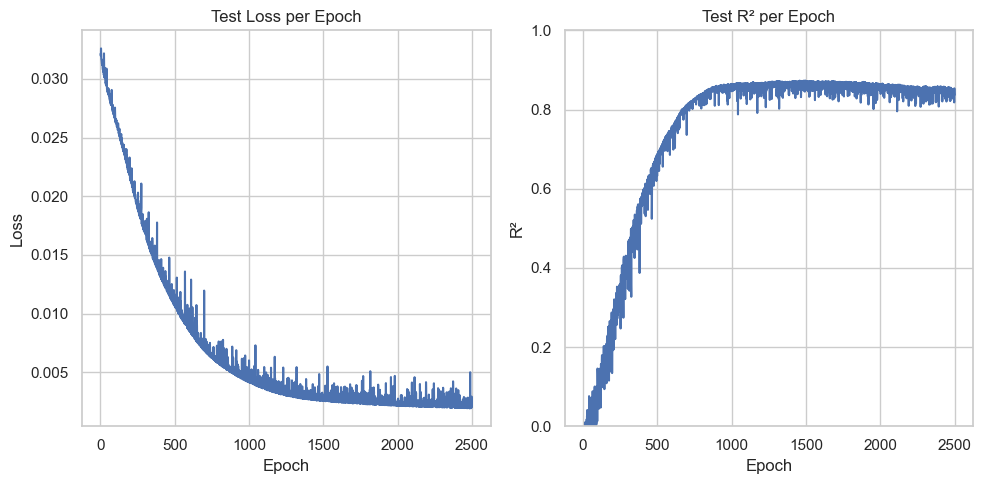

In [20]:
import matplotlib.pyplot as plt

# First figure for training data
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(range(1, len(results['losses_train']) + 1), results['losses_train'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss per Epoch')
ax1.grid(True)

ax2.plot(range(1, len(results['r2s_train']) + 1), results['r2s_train'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('R²')
ax2.set_ylim(0, 1)
ax2.set_title('Training R² per Epoch')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Second figure for test data
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(10, 5))

ax3.plot(range(1, len(results['losses_test']) + 1), results['losses_test'])
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.set_title('Test Loss per Epoch')
ax3.grid(True)

ax4.plot(range(1, len(results['r2s_test']) + 1), results['r2s_test'])
ax4.set_xlabel('Epoch')
ax4.set_ylabel('R²')
ax4.set_ylim(0, 1)
ax4.set_title('Test R² per Epoch')
ax4.grid(True)

plt.tight_layout()
plt.show()

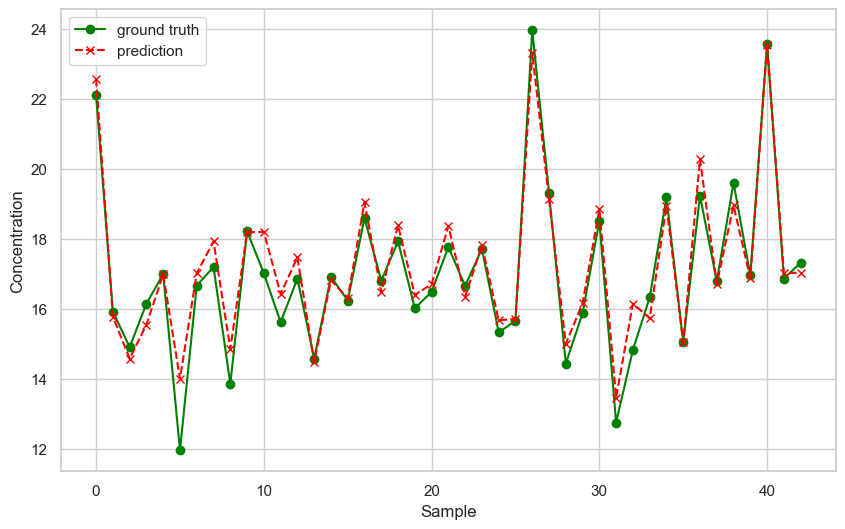

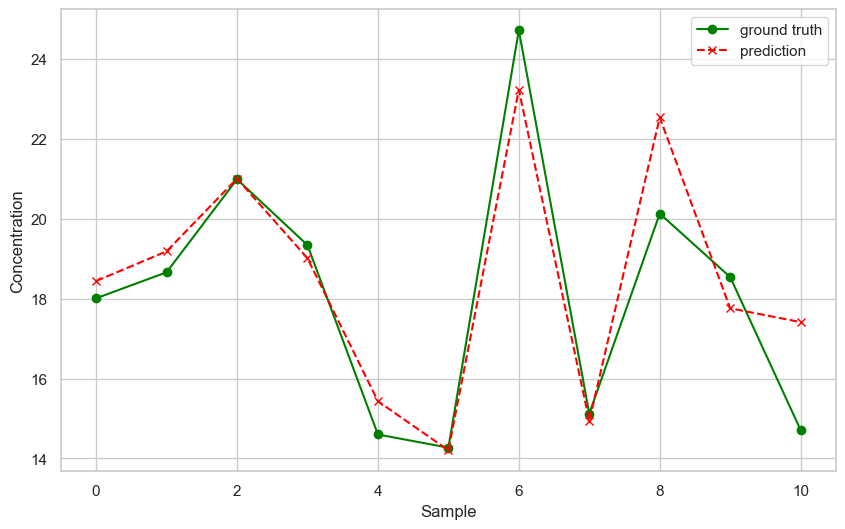

In [21]:
train_predictions = get_predictions(net, train_data)
test_predictions = get_predictions(net, test_data)
plot_predictions(train_data, train_predictions)
plot_predictions(test_data, test_predictions)